# RBF Interpolation Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RBFN import RBFN

## 1D Interpolation Example

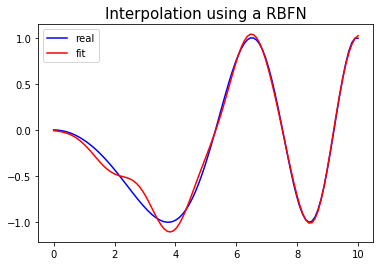

In [2]:
# generating data
x = np.linspace(0, 10, 100)
y = np.sin(-x**2/9.0)

# fitting RBF-Network with data
model = RBFN(hidden_shape=10, sigma=1.)
model.fit(x, y)
y_pred = model.predict(x)

# plotting 1D interpolation
plt.plot(x, y, 'b-', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='best')
plt.title('Interpolation using a RBFN',fontsize=15)
plt.show()

## 2D Interpolation Example

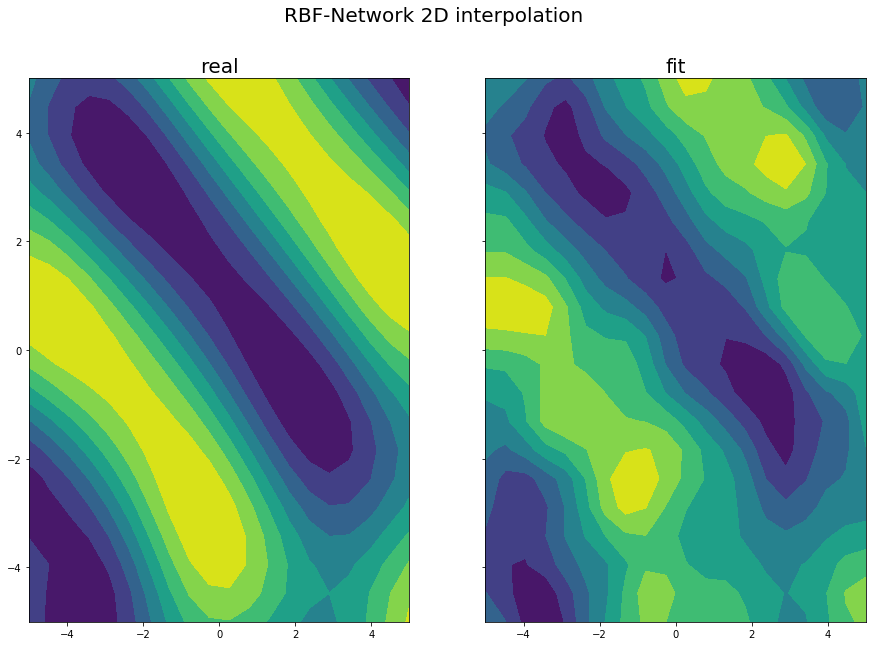

In [4]:
# generating dummy data for interpolation
x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
z = (np.sin(np.sqrt((x - 7.)**2 + (y - 9)**2)) -
     np.sin(np.sqrt((x + 5.)**2 + (y + 4)**2))) / 2.

# fitting RBF-Network with data
features = np.asarray(list(zip(x.flatten(), y.flatten())))
model = RBFN(hidden_shape=70, sigma=1.)
model.fit(features, z.flatten())
predictions = model.predict(features)

# plotting 2D interpolation
figure, (axis_left, axis_right) = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
figure.suptitle('RBF-Network 2D interpolation', fontsize=20)
axis_right.set_title('fit', fontsize=20)
axis_left.set_title('real', fontsize=20)
axis_left.contourf(x, y, z)
right_image = axis_right.contourf(x, y, predictions.reshape(20, 20))
plt.show()